In [33]:
import cv2
import numpy as np
import copy
import random
import sys
import matplotlib.pyplot as plt
%matplotlib inline


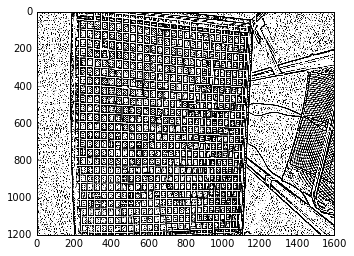

In [34]:
img = cv2.imread('./save/1_before_image.png')
bf_img = np.copy(img)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
lego_preprocessed = cv2.GaussianBlur(gray_img, (5, 5), 0)
# _, lego_binary = cv2.threshold(img,135,255,cv2.THRESH_BINARY)
lego_binary = cv2.adaptiveThreshold(lego_preprocessed, 255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2) 
# lego_binary = cv2.bitwise_not(lego_binary)
plt.imshow(lego_binary, cmap='gray')

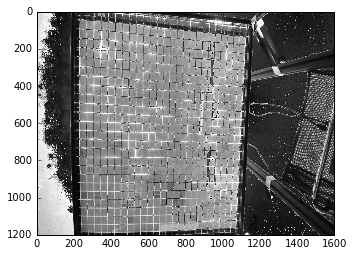

In [54]:
plt.imshow(cv2.cvtColor(img*2, cv2.COLOR_RGB2GRAY), cmap='gray')


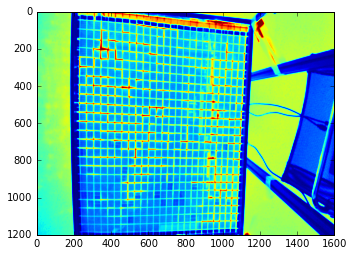

In [4]:
preprocessed_g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_blur_small = cv2.GaussianBlur(preprocessed_g, (15,15), 0)
plt.imshow(img_blur_small)

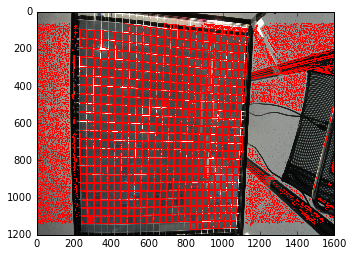

In [13]:
plt.imshow(img)

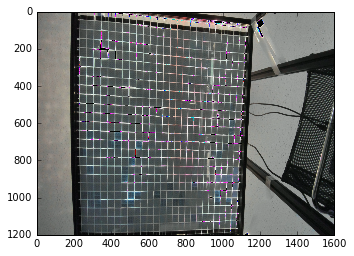

In [12]:
plt.imshow(bf_img + 5)

 _, lego_p_binary = cv2.threshold(img_blur_small,100,255,cv2.THRESH_BINARY)
# lego_p_binary = cv2.adaptiveThreshold(img_blur_small, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2) 
lego_p_binary = cv2.bitwise_not(lego_p_binary)
plt.imshow(lego_p_binary, cmap='gray')

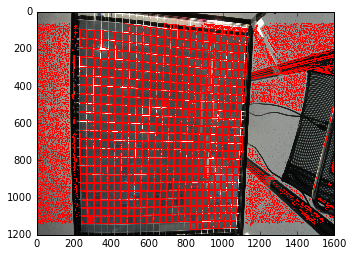

In [7]:
image, contours, hierarchy = cv2.findContours(lego_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours[550:5550], -1,(255, 0, 0),3)

plt.imshow(img)

In [221]:
len(contours)

6162

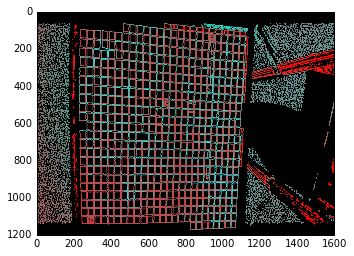

In [222]:
plt.imshow(cv2.absdiff(bf_img, img))

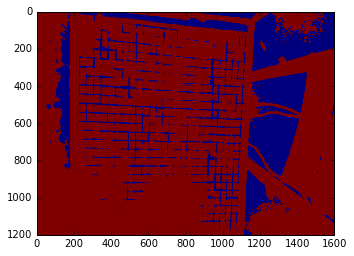

In [223]:
plt.imshow(lego_p_binary)

### 岡本先生語録  
#### 観光まちづくり  
まちづくりは住民の満足度向上を目指すもの  
観光は他の人に依存  
観光まちづくりを叫びがちなのは観光がうまくいってない人たち

### 四段階推定法
1. 発生・集中交通量予測(ti, tj)  
2. 分布交通量予測(tij)目的地選択  
3.   
4. 
  
最も多く使われるのがロジットモデル

#### 最終発表
ある観光地を取り上げ、その観光地の抱える課題、その対策と想定される効果について考察を行う。
科学的なデータ、分析結果に基づく考察を行うこと。  
-近年、需要増加（あるいは減少）が著しい観光地  
-突発的な需要増が生じている観光地、イベント  
-ピーク時とオフピーク時の差が激しい観光地  
第五回講義(12/22)にて1人5分発表、改善後レポートとしてメールで提出 (1/10正午提出)


In [1]:
src = cv2.imread("./save/1_before_image.png", cv2.IMREAD_COLOR)

if src is None:
    
    print("Failed to load image file.")
    sys.exit(1)

height, width, channels = src.shape[:3]
dst = copy.copy(src)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, bina = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
nLabels, labelImage = cv2.connectedComponents(bina)

colors = []
for i in range(1, nLabels + 1):
    colors.append(np.array([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]))

for y in range(0, height):
    for x in range(0, width):
        if labelImage[y, x] > 0:
            dst[y, x] = colors[labelImage[y, x]]
        else:
            dst[y, x] = [0, 0, 0]

plt.imshow(dst)
# cv2.namedWindow("Source", cv2.WINDOW_AUTOSIZE)
# cv2.imshow("Source", src)
# cv2.namedWindow("Connected Components", cv2.WINDOW_AUTOSIZE)
# cv2.imshow("Connected Components", dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [7]:
contours = cv2.findContours(lego_binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]

In [11]:
img_dir = 
th_area = img.shape[0] * img.shape[1] / 100
contours_large = list(filter(lambda c:cv2.contourArea(c) > th_area, contours))

outputs = []
rects = []
approxes = []

for (i,cnt) in enumerate(contours_large):
    arclen = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.02*arclen, True)
    if len(approx) < 4:
        continue
    approxes.append(approx)
    rect = getRectByPoints(approx)
    rects.append(rect)
    outputs.append(getPartImageByRect(rect))
    cv2.imwrite('./out/output'+str(i)+'.jpg', getPartImageByRect(rect))

NameError: name 'image_dir' is not defined

In [10]:
def getRectByPoints(points):
    # prepare simple array 
    points = list(map(lambda x: x[0], points))

    points = sorted(points, key=lambda x:x[1])
    top_points = sorted(points[:2], key=lambda x:x[0])
    bottom_points = sorted(points[2:4], key=lambda x:x[0])
    points = top_points + bottom_points

    left = min(points[0][0], points[2][0])
    right = max(points[1][0], points[3][0])
    top = min(points[0][1], points[1][1])
    bottom = max(points[2][1], points[3][1])
    return (top, bottom, left, right)

def getPartImageByRect(rect):
    img = cv2.imread(image_dir + image_file, 1)
    return img[rect[0]:rect[1], rect[2]:rect[3]]

注意: フレームを全て映してしまうとその角が抽出されてしまうので注意  
透視変換  
一番大きな四角形を抽出して4点の座標を取得

https://dev.classmethod.jp/smartphone/avfoundation-opencv-findcontours/  
https://blanktar.jp/blog/2015/07/python-opencv-crop-box.html

In [8]:
cnts = cv2.findContours(gray_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]  # 抽出した輪郭に近似する直線（？）を探す。

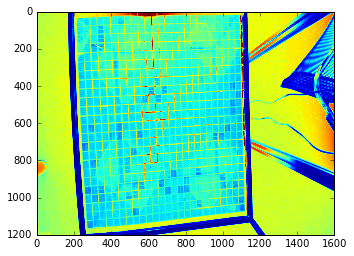

In [9]:
plt.imshow(cnts)

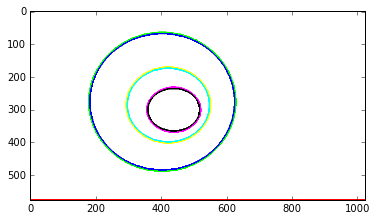

In [4]:
import cv2

img = cv2.imread("./test.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE )

cv2.drawContours(img, contours[0], -1,(255,  0,  0),3)
cv2.drawContours(img, contours[1], -1,(  0,255,  0),3)
cv2.drawContours(img, contours[2], -1,(  0,  0,255),3)
cv2.drawContours(img, contours[3], -1,(255,255,  0),3)
cv2.drawContours(img, contours[4], -1,(  0,255,255),3)
cv2.drawContours(img, contours[5], -1,(255,  0,255),3)
cv2.drawContours(img, contours[6], -1,(  0,  0,  0),3)

plt.imshow( img)

In [1]:
!ls 

1_detect_image.png        empty.jpg                 run3.py
Interactive changes.ipynb image1.png                save
Lego.iypnb                lego_square.png           select-cells.ipynb
cv2.so                    run.py                    test.png
double.jpg                run2.py
